In [ ]:
# import pandas as pd 
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np
# from sklearn.model_selection import train_test_split
# X = pd.read_csv('/gdrive/MyDrive/cleaned_training_data_01.csv')
# X['average_delay'] = X['carrier_delay'] + X['nas_delay'] + X['late_aircraft_delay']
# X = X[['crs_arr_time','actual_elapsed_time','distance','year','month','day','weekday','average_delay']]
# y = X['arr_delay']
# reg = RandomForestRegressor(n_estimators=100)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# reg.fit(X_train,y_train)

# y_pred=reg.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# rmse

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import pandas as pd 
import numpy as np
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv('/gdrive/MyDrive/cleaned_training_data_01.csv')

In [ ]:
weatherdf = pd.read_csv('/gdrive/MyDrive/weather.csv')

In [ ]:
weatherdf = weatherdf[['date','airport_code','visibility','value']]


In [ ]:
weatherdf = weatherdf.rename({'date':'fl_date','airport_code':'origin'},axis=1)


In [ ]:
df = df.merge(weatherdf, on=['fl_date','origin'])


In [ ]:
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
df['op_unique_carrier'] = df.op_unique_carrier.astype('category')
df['origin'] = df.origin.astype('category')
df['dest'] = df.dest.astype('category')
df['visibility'] = df.visibility.astype('category')

In [ ]:
def crs_dep(row):
  if row['crs_dep_time'] < 0:
    return 2400 + row['crs_dep_time']
  else:
    return row['crs_dep_time']

In [ ]:
def value(row):
  if 'snow' in row['value']:
    return 'Snow'
  elif 'rain' in row['value']:
    return 'Rain'
  elif 'showers' in row['value']:
    return 'Rain'
  elif 'possible' in row['value']:
    return 'Rain'
  elif 'drizzle' in row['value']:
    return 'Rain'
  elif 'sleet' in row['value']:
    return 'Rain/Snow'
  elif 'blizzard' in row['value']:
    return 'Snow'
  else:
    return row['value']

In [ ]:
X,y = df.drop('arr_delay',axis=1),df['arr_delay']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [ ]:
X_train['crs_dep_time'] = X_train['crs_arr_time'] - X_train['crs_elapsed_time']
X_test['crs_dep_time'] = X_test['crs_arr_time'] - X_test['crs_elapsed_time']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train['crs_dep_time'] = X_train.apply(crs_dep,axis=1)
X_test['crs_dep_time'] = X_test.apply(crs_dep,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train['value'] = X_train.apply(value,axis=1)
X_train['value'] = X_train.value.astype('category')
X_test['value'] = X_test.apply(value,axis=1)
X_test['value'] = X_test.value.astype('category')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X_train['crs_dep_time'] = X_train['crs_dep_time'].astype(float).astype(int).apply(lambda x: '{0:0>4}'.format(x)).astype(str)
X_test['crs_dep_time'] = X_test['crs_dep_time'].astype(float).astype(int).apply(lambda x: '{0:0>4}'.format(x)).astype(str)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train['crs_arr_hour'] = X_train['crs_arr_time'].astype(str).str[:2].astype(int)
X_test['crs_arr_hour'] = X_test['crs_arr_time'].astype(str).str[:2].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train['Numerical_Week']= (pd.to_datetime(X_train['fl_date']).dt.weekofyear)
X_train['Season']= (pd.to_datetime(X_train['fl_date']).dt.month - 1) // 3
X_test['Numerical_Week']= (pd.to_datetime(X_test['fl_date']).dt.weekofyear)
X_test['Season']= (pd.to_datetime(X_test['fl_date']).dt.month - 1) // 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/u

In [ ]:
X_train['Weekday'] = pd.to_datetime(X_train['fl_date']).dt.dayofweek
X_test['Weekday'] = pd.to_datetime(X_test['fl_date']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train['sumDelays'] = X_train['carrier_delay']+	X_train['weather_delay'] + 	X_train['nas_delay']+ X_train['security_delay']+ 	X_train['late_aircraft_delay']
X_train['meanOfGrouping'] = X_train.groupby(['dest','Numerical_Week','Weekday','crs_arr_hour'])['sumDelays'].transform('mean')
X_train= X_train.drop(['sumDelays'], axis=1)

X_test['sumDelays'] = X_test['carrier_delay']+	X_test['weather_delay'] + 	X_test['nas_delay']+ X_test['security_delay']+ 	X_test['late_aircraft_delay']
X_test['meanOfGrouping'] = X_test.groupby(['dest','Numerical_Week','Weekday','crs_arr_hour'])['sumDelays'].transform('mean')
X_test= X_test.drop(['sumDelays'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X_train= X_train.drop(['fl_date','mkt_unique_carrier','carrier_delay','dep_delay','dep_time','Season',	'actual_elapsed_time','weather_delay', 	'nas_delay', 	'security_delay', 'late_aircraft_delay'],axis=1)
X_train = X_train.drop(['year','crs_arr_time'],axis=1)
X_train = X_train.drop(['weekday','visibility','crs_dep_time','arr_time'],axis=1)

X_test= X_test.drop(['fl_date','mkt_unique_carrier','carrier_delay','dep_delay','dep_time','Season',	'actual_elapsed_time','weather_delay', 	'nas_delay', 	'security_delay', 'late_aircraft_delay'],axis=1)
X_test = X_test.drop(['year','crs_arr_time'],axis=1)
X_test = X_test.drop(['weekday','visibility','crs_dep_time','arr_time'],axis=1)

In [ ]:
X_test

,op_unique_carrier,origin,dest,crs_elapsed_time,distance,month,day,value,crs_arr_hour,Numerical_Week,Weekday,meanOfGrouping
532611,AA,LAX,ORD,252.0,1744.0,5,15,Cloudy,71,20,2,0.0
457273,UA,EWR,JAX,163.0,820.0,2,21,Partly cloudy,16,8,2,0.0
101750,AA,ORD,SLC,204.0,1250.0,6,22,Partly cloudy,20,25,4,0.0
365335,UA,SEA,IAH,259.0,1874.0,3,20,Overcast,20,12,1,0.0
278537,B6,EWR,BOS,66.0,200.0,10,25,Rain,22,43,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
342860,WN,BOS,BWI,90.0,369.0,4,30,Rain,13,18,0,0.0
550450,WN,LAS,DAL,165.0,1067.0,9,5,Partly cloudy,12,36,2,0.0
345624,ZW,ORD,CAK,89.0,343.0,6,8,Sunny,16,23,4,162.0
245307,OH,CLT,OAJ,69.0,191.0,7,30,Rain,17,31,1,25.0


In [ ]:
# X = X.drop(['crs_dep_time','origin','dest','op_unique_carrier','day','year','dep_time','arr_time','sumDelays','crs_arr_time','weekday'],axis=1)

In [ ]:
X_train.columns

Index(['op_unique_carrier', 'origin', 'dest', 'crs_elapsed_time', 'distance',
       'month', 'day', 'value', 'crs_arr_hour', 'Numerical_Week', 'Weekday',
       'meanOfGrouping'],
      dtype='object')

In [ ]:
# X = pd.get_dummies(X)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# pca = PCA()
# scaler = StandardScaler()
# X=scaler.fit_transform(X)
# pca.fit_transform(X)

In [ ]:
# features = range(pca.n_components_)
# plt.bar(features, pca.explained_variance_ratio_)
# plt.xticks(features)
# plt.xlabel("PCA features")
# plt.ylabel("variance")
# plt.show()

In [ ]:
# pca = PCA(n_components=7)
# pca.fit(X)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV
import xgboost as xg

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# params={
#     'n_estimators':[100,150,200,250,300,350,400],
#     'max_depth':[1,2,4,8,16,32,64],
#     'min_samples_leaf':[1, 2, 4,8]
# }

In [ ]:
# model = RandomForestRegressor()


In [ ]:
# grid_search = GridSearchCV(estimator = model, param_grid = params, 
#                           cv = 3, n_jobs = 1, verbose = 51)

In [ ]:
# grid_search.fit(X_train,y_train)

In [ ]:
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# model.score(X_test,y_test)

In [ ]:
#print('mean_squared_error:', mean_squared_error(y_test,y_pred))
#print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
#print('r2 score:', r2_score(y_test,y_pred))
#print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [ ]:
#model = GradientBoostingRegressor(n_estimators=150,learning_rate=1.5,random_state=1)
#model.fit(X_train,y_train)
#y_pred = model.predict(X_test)

In [ ]:
# print('mean_squared_error:', mean_squared_error(y_test,y_pred))
# print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
# print('r2 score:', r2_score(y_test,y_pred))
# print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [ ]:
import xgboost as xgb

In [ ]:
X.columns

Index(['fl_date', 'mkt_unique_carrier', 'op_unique_carrier', 'origin',
       'dep_time', 'dep_delay', 'dest', 'arr_time', 'crs_arr_time',
       'actual_elapsed_time', 'crs_elapsed_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'year', 'month', 'day', 'weekday', 'visibility', 'value'],
      dtype='object')

In [ ]:
# xgbr = xgb.XGBRegressor(n_estimators =200,random_state=12) 
# xgbr.fit(X_train,y_train)
# y_pred = xgbr.predict(X_test)
# xgbr.score(X_test,y_test)

In [ ]:
# print('mean_squared_error:', mean_squared_error(y_test,y_pred))
# print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
# print('r2 score:', r2_score(y_test,y_pred))
# print('Adjusted R2 value:', 1 - (1-xgbr.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [ ]:
import lightgbm

In [ ]:
model = lightgbm.LGBMRegressor(n_estimators=100,random_state=12)

In [ ]:
model.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=12, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_test

,op_unique_carrier,origin,dest,crs_elapsed_time,distance,month,day,value,crs_arr_hour,Numerical_Week,Weekday,meanOfGrouping
532611,AA,LAX,ORD,252.0,1744.0,5,15,Cloudy,71,20,2,0.0
457273,UA,EWR,JAX,163.0,820.0,2,21,Partly cloudy,16,8,2,0.0
101750,AA,ORD,SLC,204.0,1250.0,6,22,Partly cloudy,20,25,4,0.0
365335,UA,SEA,IAH,259.0,1874.0,3,20,Overcast,20,12,1,0.0
278537,B6,EWR,BOS,66.0,200.0,10,25,Rain,22,43,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
342860,WN,BOS,BWI,90.0,369.0,4,30,Rain,13,18,0,0.0
550450,WN,LAS,DAL,165.0,1067.0,9,5,Partly cloudy,12,36,2,0.0
345624,ZW,ORD,CAK,89.0,343.0,6,8,Sunny,16,23,4,162.0
245307,OH,CLT,OAJ,69.0,191.0,7,30,Rain,17,31,1,25.0


In [ ]:
print('mean_squared_error:', mean_squared_error(y_test,y_pred))
print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test,y_pred))
print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

mean_squared_error: 320.77829876328343
RSME: 17.91028472032992
r2 score: 0.8167320497485848
Adjusted R2 value: 0.8167195695231625


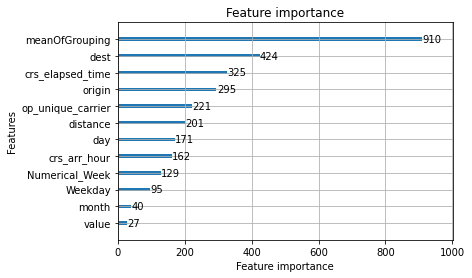

In [ ]:
lightgbm.plot_importance(model)